In [2]:
# Import necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Q1

## Read 1.jpg image

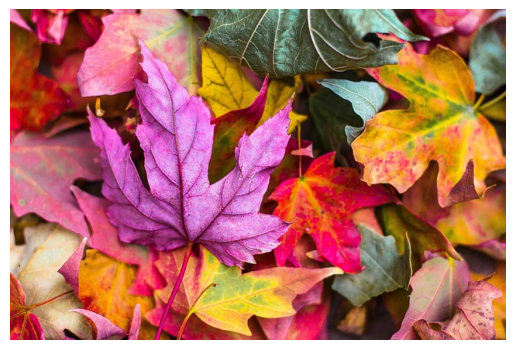

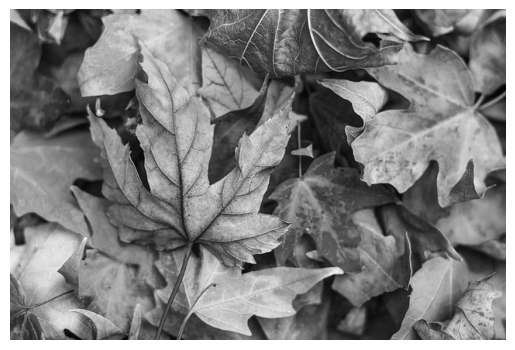

In [3]:
image1 = cv2.imread("./images/1.jpg")
image1_gray = cv2.imread("./images/1.jpg", cv2.IMREAD_GRAYSCALE)

image1_rgb = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Display image1 colorful
plt.imshow(image1_rgb)
plt.axis('off')  # Hide axis
plt.show()

# Display image1 gray scale
plt.imshow(image1_gray, cmap='gray')
plt.axis('off')  # Hide axis
plt.show()


## Q1.1: RGB to CMYK & CMYK to RGB

In [4]:
def RGB_to_CMYK(r_values, g_values, b_values, RGB_SCALE = 255, CMYK_SCALE = 100):
      
  # Convert RGB to CMYK
  c_values = 1 - r_values / RGB_SCALE
  m_values = 1 - g_values / RGB_SCALE
  y_values = 1 - b_values / RGB_SCALE
  k_values = np.minimum.reduce([c_values, m_values, y_values])
  
  c_values = (c_values - k_values) / (1 - k_values)
  m_values = (m_values - k_values) / (1 - k_values)
  y_values = (y_values - k_values) / (1 - k_values)

  # Scale CMYK values
  c_values *= CMYK_SCALE
  m_values *= CMYK_SCALE
  y_values *= CMYK_SCALE
  k_values *= CMYK_SCALE

  return c_values, m_values, y_values, k_values

In [5]:
def CMYK_to_RGB(c_values, m_values, y_values, k_values, RGB_SCALE=255, CMYK_SCALE=100):
    # Convert CMYK values back to CMY values
    c_values = c_values / CMYK_SCALE
    m_values = m_values / CMYK_SCALE
    y_values = y_values / CMYK_SCALE
    k_values = k_values / CMYK_SCALE
    
    # Calculate RGB values
    r_values = RGB_SCALE * (1 - c_values) * (1 - k_values)
    g_values = RGB_SCALE * (1 - m_values) * (1 - k_values)
    b_values = RGB_SCALE * (1 - y_values) * (1 - k_values)
    
    # Clip values to ensure they are within the valid range [0, RGB_SCALE]
    r_values = np.clip(r_values, 0, RGB_SCALE)
    g_values = np.clip(g_values, 0, RGB_SCALE)
    b_values = np.clip(b_values, 0, RGB_SCALE)
    
    return r_values.astype(np.uint8), g_values.astype(np.uint8), b_values.astype(np.uint8)

# Example usage:
# r_values, g_values, b_values = CMYK_to_RGB(c_values, m_values, y_values, k_values)

## Q1.2: RGB to HSI

In [6]:
def RGB_to_HSI(r, g, b, RGB_SCALE=255):
    # Normalize RGB values
    r_norm = r / RGB_SCALE
    g_norm = g / RGB_SCALE
    b_norm = b / RGB_SCALE
    
    # Calculate Intensity (I)
    i = (r_norm + g_norm + b_norm) / 3.0
    
    # Calculate Saturation (S)
    s = np.where(i == 0, 0, 1 - 3 * np.minimum(r_norm, np.minimum(g_norm, b_norm)) / (r_norm + g_norm + b_norm))
    
    # Calculate Hue (H)
    theta = np.arccos(0.5 * ((r_norm - g_norm) + (r_norm - b_norm)) / np.sqrt((r_norm - g_norm)**2 + (r_norm - b_norm) * (g_norm - b_norm)))
    h = np.where(b_norm <= g_norm, theta, np.where(b_norm <= r_norm, 2 * np.pi / 3 + theta, 4 * np.pi / 3 + theta))
    
    # Convert Hue (H) to degrees
    h_degrees = np.degrees(h)
    h_degrees[h_degrees < 0] += 360
    
    return h_degrees, s, i

## Show result image for all functions

In [7]:
b, g, r = cv2.split(image1)

original_image = image1_rgb

c, m, y, k = RGB_to_CMYK(r, g, b)
cmyk_image = np.dstack((c, m, y, k)).astype(np.uint8)

new_r, new_g, new_b = CMYK_to_RGB(c, m, y, k)
new_rgb_image = np.dstack((new_r, new_g, new_b))

h, s, i = RGB_to_HSI(r, g, b)
hsi_image = cv2.merge([h.astype(np.uint8), (s * 255).astype(np.uint8), (i * 255).astype(np.uint8)])
hsi_image_rgb = cv2.cvtColor(hsi_image, cv2.COLOR_BGR2RGB)



c:\Python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


show original image

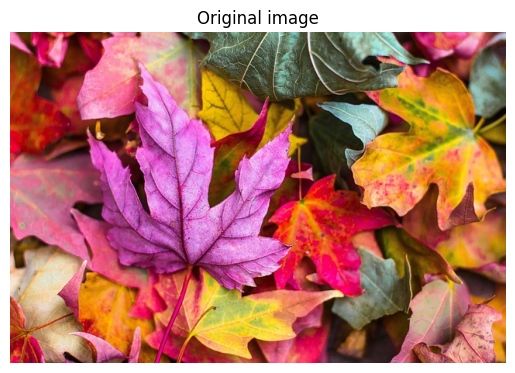

In [8]:
# Display image1 colorful
plt.imshow(image1_rgb)
plt.axis('off')  # Hide axis
plt.title('Original image')
plt.show()

show converted cmyk result from rgb

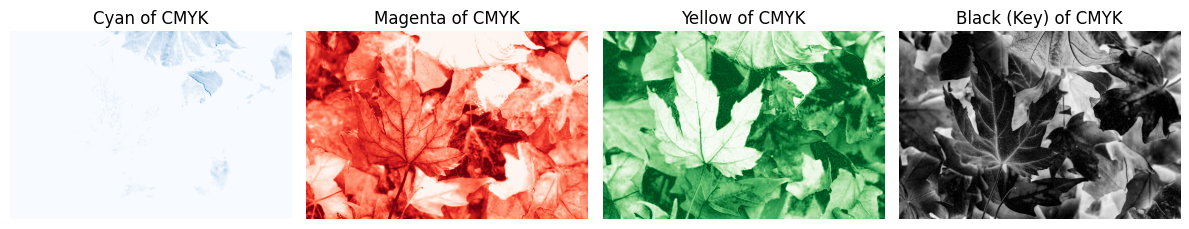

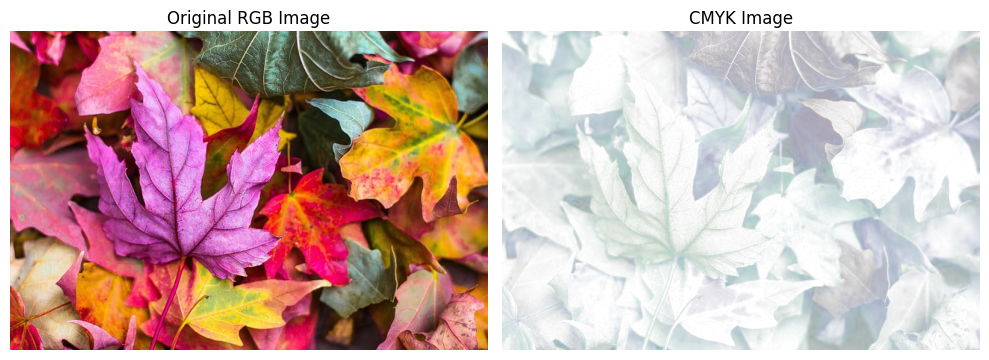

In [9]:
# Display each CMYK channel separately
plt.figure(figsize=(12, 4))

# Cyan channel
plt.subplot(1, 4, 1)
plt.imshow(c, cmap='Blues')
plt.title('Cyan of CMYK')
plt.axis('off')

# Magenta channel
plt.subplot(1, 4, 2)
plt.imshow(m, cmap='Reds')
plt.title('Magenta of CMYK')
plt.axis('off')

# Yellow channel
plt.subplot(1, 4, 3)
plt.imshow(y, cmap='Greens')
plt.title('Yellow of CMYK')
plt.axis('off')

# Black (Key) channel
plt.subplot(1, 4, 4)
plt.imshow(k, cmap='gray')
plt.title('Black (Key) of CMYK')
plt.axis('off')

plt.tight_layout()
plt.show()

# Plot original RGB image and CMYK image side by side
plt.figure(figsize=(10, 5))

# Original RGB image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original RGB Image')
plt.axis('off')

# CMYK image
plt.subplot(1, 2, 2)
plt.imshow(cmyk_image)
plt.title('CMYK Image')
plt.axis('off')

plt.tight_layout()
plt.show()

show converted rgb result from cmyk

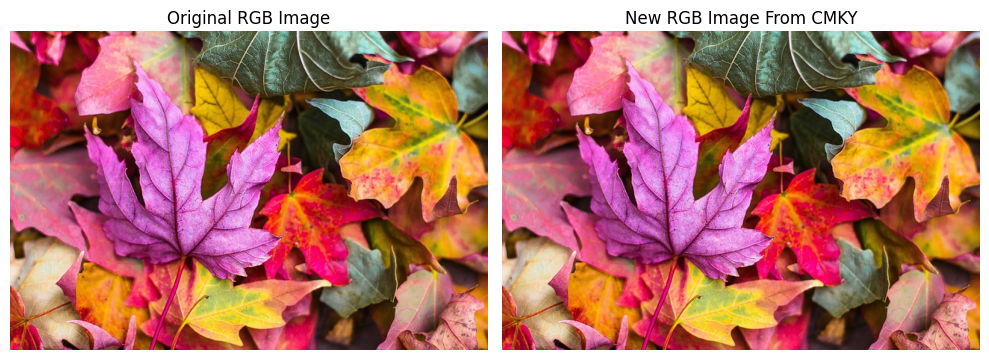

In [10]:
# Plot original RGB image and CMYK image side by side
plt.figure(figsize=(10, 5))

# Original RGB image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original RGB Image')
plt.axis('off')

# CMYK image
plt.subplot(1, 2, 2)
plt.imshow(new_rgb_image)
plt.title('New RGB Image From CMKY')
plt.axis('off')

plt.tight_layout()
plt.show()

show converted hsi from rgb

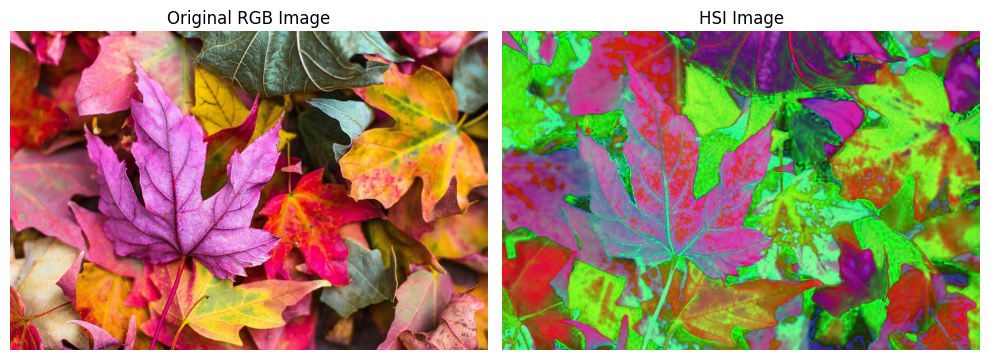

In [11]:
# Plot original RGB image and CMYK image side by side
plt.figure(figsize=(10, 5))

# Original RGB image
plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original RGB Image')
plt.axis('off')

# CMYK image
plt.subplot(1, 2, 2)
plt.imshow(hsi_image_rgb)
plt.title('HSI Image')
plt.axis('off')

plt.tight_layout()
plt.show()

# Q2

## Read images

In [12]:
# Load grayscale images
gray_img1 = cv2.imread('./images/2.jpg', cv2.IMREAD_GRAYSCALE)
gray_img2 = cv2.imread('./images/3.jpg', cv2.IMREAD_GRAYSCALE)

<h1> Resize way </h1>

image1:  899 917
image2:  906 917
image1_resized:  899 917
image2_resized:  899 917


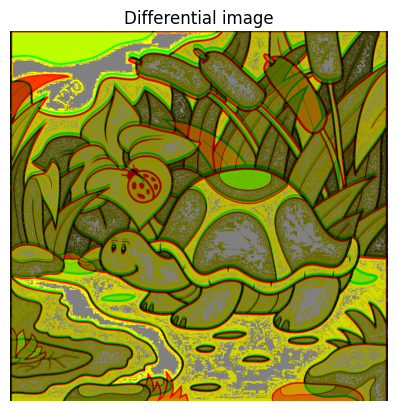

In [13]:
print("image1: ", gray_img1.shape[0], gray_img1.shape[1])
print("image2: ", gray_img2.shape[0], gray_img2.shape[1])

# Find minimum dimensions
min_height = min(gray_img1.shape[0], gray_img2.shape[0])
min_width = min(gray_img1.shape[1], gray_img2.shape[1])

# Resize images to minimum dimensions
gray_img1_resized = cv2.resize(gray_img1, (min_width, min_height))
gray_img2_resized = cv2.resize(gray_img2, (min_width, min_height))

print("image1_resized: ", gray_img1_resized.shape[0], gray_img1.shape[1])
print("image2_resized: ", gray_img2_resized.shape[0], gray_img2.shape[1])

# Calculate absolute differences
abs_diff = cv2.absdiff(gray_img1_resized, gray_img2_resized)

# Create an empty image with 3 channels (RGB)
colored_diff_img = np.zeros((min_height, min_width, 3), dtype=np.uint8)

# Set each RGB channel equal to one of the cropped gray images
colored_diff_img[:, :, 0] = gray_img1_resized  # Red channel
colored_diff_img[:, :, 1] = gray_img2_resized  # Green channel

# Set pixels with no differences to gray
colored_diff_img[np.where(abs_diff == 0)] = [128, 128, 128]

# Display image1 colorful
plt.imshow(colored_diff_img)
plt.axis('off')  # Hide axis
plt.title('Differential image')
plt.show()


<h1> Crop from end way </h1>

image1:  899 917
image2:  906 917
image1_cropped:  899 917
image2_cropped:  899 917


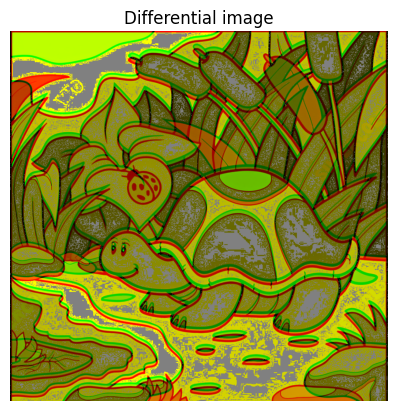

In [14]:
print("image1: ", gray_img1.shape[0], gray_img1.shape[1])
print("image2: ", gray_img2.shape[0], gray_img2.shape[1])

# Find minimum dimensions
min_height = min(gray_img1.shape[0], gray_img2.shape[0])
min_width = min(gray_img1.shape[1], gray_img2.shape[1])

# Crop images to minimum dimensions
gray_img1_cropped = gray_img1[:min_height, :min_width]
gray_img2_cropped = gray_img2[:min_height, :min_width]

print("image1_cropped: ", gray_img1_cropped.shape[0], gray_img1.shape[1])
print("image2_cropped: ", gray_img2_cropped.shape[0], gray_img2.shape[1])

# Calculate absolute differences
abs_diff = cv2.absdiff(gray_img1_cropped, gray_img2_cropped)

# Create an empty image with 3 channels (RGB)
colored_diff_img = np.zeros((min_height, min_width, 3), dtype=np.uint8)

# Set each RGB channel equal to one of the cropped gray images
colored_diff_img[:, :, 0] = gray_img1_cropped  # Red channel
colored_diff_img[:, :, 1] = gray_img2_cropped  # Green channel

# Set pixels with no differences to gray
colored_diff_img[np.where(abs_diff == 0)] = [128, 128, 128]

# Display image1 colorful
plt.imshow(colored_diff_img)
plt.axis('off')  # Hide axis
plt.title('Differential image')
plt.show()


<h1> crop from beginning way </h1>

image1:  899 917
image2:  906 917
image1_cropped:  899 917
image2_cropped:  899 917


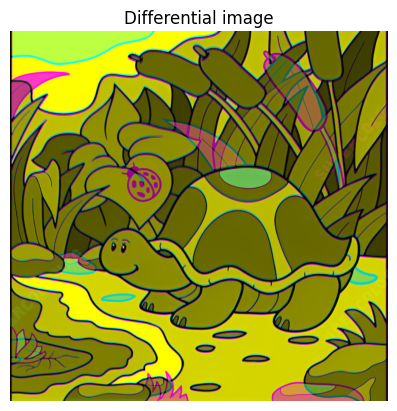

In [38]:
print("image1: ", gray_img1.shape[0], gray_img1.shape[1])
print("image2: ", gray_img2.shape[0], gray_img2.shape[1])

# Find minimum dimensions
min_height = min(gray_img1.shape[0], gray_img2.shape[0])
min_width = min(gray_img1.shape[1], gray_img2.shape[1])

starting_height_1 = gray_img1.shape[0] - min_height
starting_height_2 = gray_img2.shape[0] - min_height

# Crop images to minimum dimensions
gray_img1_cropped = gray_img1[starting_height_1:, :min_width]
gray_img2_cropped = gray_img2[starting_height_2:, :min_width]

print("image1_cropped: ", gray_img1_cropped.shape[0], gray_img1.shape[1])
print("image2_cropped: ", gray_img2_cropped.shape[0], gray_img2.shape[1])

colored_diff_img = np.zeros((min_height, min_width, 3), dtype=np.uint8)

# Calculate absolute differences
abs_diff = cv2.absdiff(gray_img1_cropped, gray_img2_cropped)

# Create an empty image with 3 channels (RGB)
colored_diff_img = np.zeros((min_height, min_width, 3), dtype=np.uint8)

# Set each RGB channel equal to one of the cropped gray images
colored_diff_img[:, :, 0] = gray_img1_cropped  # Red channel
colored_diff_img[:, :, 1] = gray_img2_cropped  # Green channel

# Set pixels with no differences to gray
# colored_diff_img[np.where(abs_diff <= 10)] = [128, 128, 128]

# b_channel = np.zeros()

colored_diff_img[:, :, 2] = abs_diff

# Display image1 colorful
plt.imshow(colored_diff_img)
plt.axis('off')  # Hide axis
plt.title('Differential image')
plt.show()


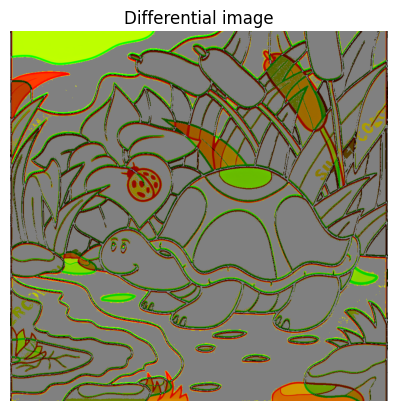

In [43]:
def diff (gray_img1, gray_img2):
    
  # Find minimum dimensions
  min_height = min(gray_img1.shape[0], gray_img2.shape[0])
  min_width = min(gray_img1.shape[1], gray_img2.shape[1])

  starting_height_1 = gray_img1.shape[0] - min_height
  starting_height_2 = gray_img2.shape[0] - min_height

  # Crop images to minimum dimensions
  gray_img1_cropped = gray_img1[starting_height_1:, :min_width]
  gray_img2_cropped = gray_img2[starting_height_2:, :min_width]

  colored_diff_img = np.zeros((min_height, min_width, 3), dtype=np.uint8)

  # Calculate absolute differences
  abs_diff = cv2.absdiff(gray_img1_cropped, gray_img2_cropped)

  # Create an empty image with 3 channels (RGB)
  colored_diff_img = np.zeros((min_height, min_width, 3), dtype=np.uint8)

  # Set each RGB channel equal to one of the cropped gray images
  colored_diff_img[:, :, 0] = gray_img1_cropped  # Red channel
  colored_diff_img[:, :, 1] = gray_img2_cropped  # Green channel

  # Set pixels with no differences to gray
  colored_diff_img[np.where(abs_diff <= 10)] = [128, 128, 128]

  return colored_diff_img

colored_diff_img = diff(gray_img1, gray_img2)

# Display image1 colorful
plt.imshow(colored_diff_img)
plt.axis('off')  # Hide axis
plt.title('Differential image')
plt.show()

## Find differences between two pictures

In [46]:
def diff (gray_img1, gray_img2):

  # Find minimum dimensions
  min_height = min(gray_img1.shape[0], gray_img2.shape[0])
  min_width = min(gray_img1.shape[1], gray_img2.shape[1])

  starting_height_1 = gray_img1.shape[0] - min_height
  starting_height_2 = gray_img2.shape[0] - min_height

  # Crop images to minimum dimensions
  gray_img1_cropped = gray_img1[starting_height_1:, :min_width]
  gray_img2_cropped = gray_img2[starting_height_2:, :min_width]

  colored_diff_img = np.zeros((min_height, min_width, 3), dtype=np.uint8)

  # Calculate absolute differences
  abs_diff = cv2.absdiff(gray_img1_cropped, gray_img2_cropped)

  # Create an empty image with 3 channels (RGB)
  colored_diff_img = np.zeros((min_height, min_width, 3), dtype=np.uint8)

  # Set each RGB channel equal to one of the cropped gray images
  colored_diff_img[:, :, 0] = gray_img1_cropped  # Red channel
  colored_diff_img[:, :, 1] = gray_img2_cropped  # Green channel

  colored_diff_img[:, :, 2] = gray_img1_cropped  # Green channel
  
  return colored_diff_img

## Show result

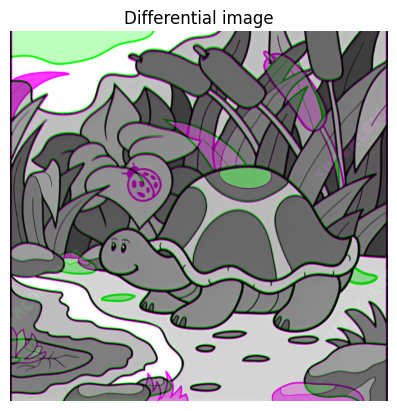

In [47]:
colored_diff_img = diff(gray_img1, gray_img2)

# Display image1 colorful
plt.imshow(colored_diff_img)
plt.axis('off')  # Hide axis
plt.title('Differential image')
plt.show()

